<a href="https://colab.research.google.com/github/thuytien050897/TrucQuanHoaDL/blob/main/TQHDL_CK_Nhom1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# khai báo thư viện
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import seaborn as sns

# **1. Xử lý và phân tích dữ liệu**

In [ ]:
data_path = '/content/sample_data/sample_-_superstore.xls'

In [ ]:
# đọc dữ liệu sheet "Orders"
orders_df = pd.read_excel(data_path, sheet_name="Orders")
orders_df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# đọc dữ liệu sheet "Returns"
returns_df = pd.read_excel(data_path, sheet_name="Returns")
returns_df.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [ ]:
# đọc dữ liệu sheet "People"
people_df = pd.read_excel(data_path, sheet_name="People")
people_df.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [ ]:
# bỏ các giá trị bị thiếu
orders_df = orders_df.dropna()
returns_df = returns_df.dropna()
people_df = people_df.dropna()

# chuyển đổi định dạng
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
orders_df['Ship Date'] = pd.to_datetime(orders_df['Ship Date'])
orders_df['Product Name'] = orders_df['Product Name'].str.strip()

# kết hợp dữ liệu returns và orders
df = returns_df.merge(orders_df, on='Order ID')

In [ ]:
# tìm giá trị nhỏ nhất và lớn nhất của cột 'Order Date'
earliest_order_date = df['Order Date'].min()
latest_order_date = df['Order Date'].max()

# tìm giá trị nhỏ nhất và lớn nhất của cột 'Ship Date'
earliest_ship_date = df['Ship Date'].min()
latest_ship_date = df['Ship Date'].max()

print(f"Order Date từ: {earliest_order_date} đến {latest_order_date}")
print(f"Ship Date từ: {earliest_ship_date} đến {latest_ship_date}")

print(f"Vậy, tập dữ liệu Superstore Sales bao gồm các đơn hàng được đặt từ {earliest_order_date.date()} đến {latest_order_date.date()}.")


Order Date từ: 2014-01-20 00:00:00 đến 2017-12-30 00:00:00
Ship Date từ: 2014-01-25 00:00:00 đến 2018-01-03 00:00:00
Vậy, tập dữ liệu Superstore Sales bao gồm các đơn hàng được đặt từ 2014-01-20 đến 2017-12-30.


In [ ]:
# tạo một cột mới "Order Year" cho năm của đơn hàng
df['Order Year'] = df['Order Date'].dt.year
# tạo cột mới "Order Month" trích từ cột "Order Date"
df['Order Month'] = df['Order Date'].dt.month

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Returned       800 non-null    object        
 1   Order ID       800 non-null    object        
 2   Row ID         800 non-null    int64         
 3   Order Date     800 non-null    datetime64[ns]
 4   Ship Date      800 non-null    datetime64[ns]
 5   Ship Mode      800 non-null    object        
 6   Customer ID    800 non-null    object        
 7   Customer Name  800 non-null    object        
 8   Segment        800 non-null    object        
 9   Country        800 non-null    object        
 10  City           800 non-null    object        
 11  State          800 non-null    object        
 12  Postal Code    800 non-null    int64         
 13  Region         800 non-null    object        
 14  Product ID     800 non-null    object        
 15  Category       800 non-

In [ ]:
# tính doanh thu theo từng năm
annual_sales = df.groupby('Order Year')['Sales'].sum().reset_index()

# tính doanh thu theo từng tháng trong mỗi năm
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# hiển thị kết quả
print("Doanh thu theo từng năm:")
print(annual_sales)
print("\nDoanh thu theo từng tháng trong mỗi năm:")
print(monthly_sales)

Doanh thu theo từng năm:
   Order Year       Sales
0        2014  29219.5480
1        2015  39660.8940
2        2016  36121.7720
3        2017  75502.0639

Doanh thu theo từng tháng trong mỗi năm:
    Order Year  Order Month       Sales
0         2014            1     38.6600
1         2014            2     11.3640
2         2014            3   1301.8300
3         2014            4    233.9900
4         2014            5   1673.9200
5         2014            6    963.7200
6         2014            7   4261.7640
7         2014            8   5112.9080
8         2014            9   8183.6020
9         2014           10   2328.9620
10        2014           11   2239.4240
11        2014           12   2869.4040
12        2015            1   2042.4380
13        2015            2   1306.7400
14        2015            3    969.6120
15        2015            4   3716.3620
16        2015            5   4249.0680
17        2015            6    627.6640
18        2015            7    170.3520
19 

In [ ]:
order_counts_by_ship_mode = df.groupby('Ship Mode').size()

print("Số lượng đơn hàng theo từng phương thức vận chuyển:")
print(order_counts_by_ship_mode)

Số lượng đơn hàng theo từng phương thức vận chuyển:
Ship Mode
First Class       152
Same Day           64
Second Class      134
Standard Class    450
dtype: int64


# **2. Trực quan hóa dữ liệu**

# 2.1. Phân tích thời gian giao hàng

In [ ]:
# Tính toán thời gian giao hàng (số ngày từ ngày đặt hàng đến ngày giao hàng)
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Thực hiện các phân tích thống kê cơ bản
mean_shipping_time = df['Shipping Time'].mean()
min_shipping_time = df['Shipping Time'].min()
max_shipping_time = df['Shipping Time'].max()

print(f"Thời gian giao hàng trung bình: {mean_shipping_time:.2f} ngày")
print(f"Thời gian giao hàng tối thiểu: {min_shipping_time} ngày")
print(f"Thời gian giao hàng tối đa: {max_shipping_time} ngày")

Thời gian giao hàng trung bình: 3.83 ngày
Thời gian giao hàng tối thiểu: 0 ngày
Thời gian giao hàng tối đa: 7 ngày


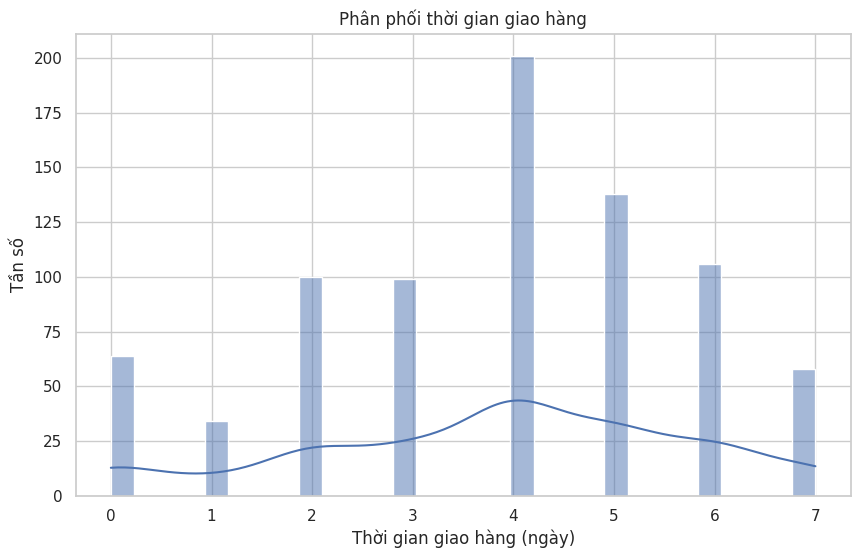

In [ ]:
# Trực quan hóa phân phối của thời gian giao hàng
plt.figure(figsize=(10, 6))
sns.histplot(df['Shipping Time'], bins=30, kde=True)
plt.title('Phân phối thời gian giao hàng')
plt.xlabel('Thời gian giao hàng (ngày)')
plt.ylabel('Tần số')
plt.show()


# 2.2. Phân tích khách hàng

In [ ]:
# Phân tích mô hình mua sắm của từng nhóm khách hàng
purchase_patterns = df.groupby('Segment').agg({
    'Customer ID': 'nunique',  # Số lượng khách hàng không trùng trong từng nhóm
    'Order ID': 'count',       # Số lượng đơn hàng trong từng nhóm
    'Sales': ['sum', 'mean'],  # Tổng doanh thu và doanh thu trung bình của từng nhóm
    'Quantity': 'sum'          # Tổng số lượng sản phẩm đã bán trong từng nhóm
})

print("\nPhân tích mô hình mua sắm của từng nhóm khách hàng:")
print(purchase_patterns)



Phân tích mô hình mua sắm của từng nhóm khách hàng:
            Customer ID Order ID        Sales             Quantity
                nunique    count          sum        mean      sum
Segment                                                           
Consumer            130      426  105385.2523  247.383221     1614
Corporate            77      257   51912.0436  201.992388      984
Home Office          40      117   23206.9820  198.350274      455


<ipython-input-159-8d0bd01d441e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_per_segment.index, y=revenue_per_segment.values, palette=colors)
<ipython-input-159-8d0bd01d441e>:9: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=revenue_per_segment.index, y=revenue_per_segment.values, palette=colors)


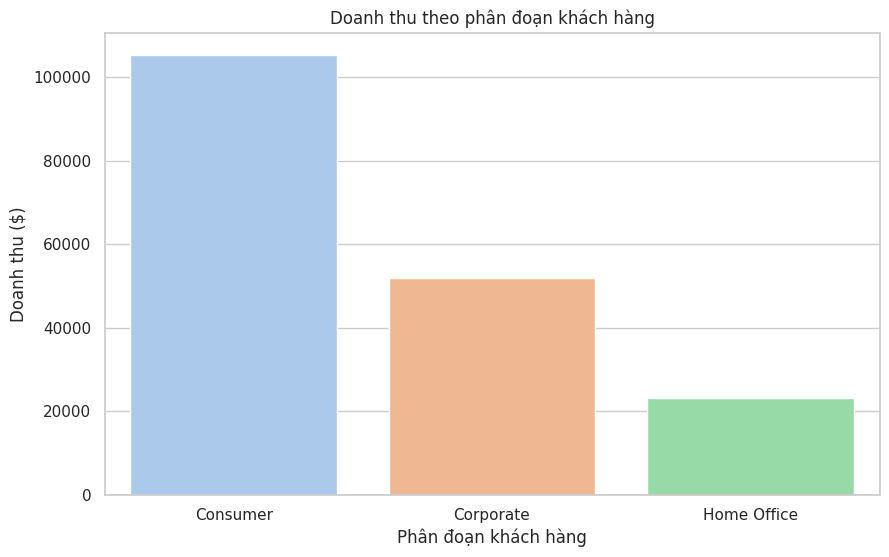

In [ ]:

# Dữ liệu doanh thu đã tính từ trước
revenue_per_segment = purchase_patterns['Sales']['sum']

# Tạo màu sắc cho biểu đồ
colors = sns.color_palette('pastel')

# Trực quan hóa doanh thu theo Segment (phân đoạn khách hàng)
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_per_segment.index, y=revenue_per_segment.values, palette=colors)
plt.title('Doanh thu theo phân đoạn khách hàng')
plt.xlabel('Phân đoạn khách hàng')
plt.ylabel('Doanh thu ($)')
plt.show()


In [ ]:
# Phân tích khách hàng tiềm năng
# Tính tổng doanh thu từng khách hàng
revenue_per_customer = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Customer Name': 'first',  # Lấy tên khách hàng của khách hàng đầu tiên
    'Segment': 'first'          # Lấy loại khách hàng của khách hàng đầu tiên
}).sort_values(by='Sales', ascending=False)

print("\nTop 10 khách hàng có doanh thu cao nhất:")
print(revenue_per_customer.head(10))

# Tính số lượng đơn hàng từng khách hàng
orders_per_customer = df.groupby('Customer ID').agg({
    'Order ID': 'count',
    'Customer Name': 'first',  # Lấy tên khách hàng của khách hàng đầu tiên
    'Segment': 'first'          # Lấy loại khách hàng của khách hàng đầu tiên
}).sort_values(by='Order ID', ascending=False)

print("\nTop 10 khách hàng có số lượng đơn hàng nhiều nhất:")
print(orders_per_customer.head(10))



Top 10 khách hàng có doanh thu cao nhất:
                 Sales    Customer Name    Segment
Customer ID                                       
RB-19360     14052.480     Raymond Buch   Consumer
SV-20365      7359.918      Seth Vernon   Consumer
CL-12565      4409.020      Clay Ludtke   Consumer
JE-15715      4299.843       Joe Elijah   Consumer
DM-13015      4283.792    Darrin Martin   Consumer
NW-18400      3568.667   Natalie Webber   Consumer
RW-19540      3397.732      Rick Wilson  Corporate
DR-12880      3254.742  Dan Reichenbach  Corporate
TS-21205      2942.784      Thomas Seio  Corporate
JE-15745      2717.310       Joel Eaton   Consumer

Top 10 khách hàng có số lượng đơn hàng nhiều nhất:
             Order ID     Customer Name    Segment
Customer ID                                       
SV-20365           14       Seth Vernon   Consumer
TB-21055           13   Ted Butterfield   Consumer
AJ-10795           11   Anthony Johnson  Corporate
WB-21850           11     William Brown

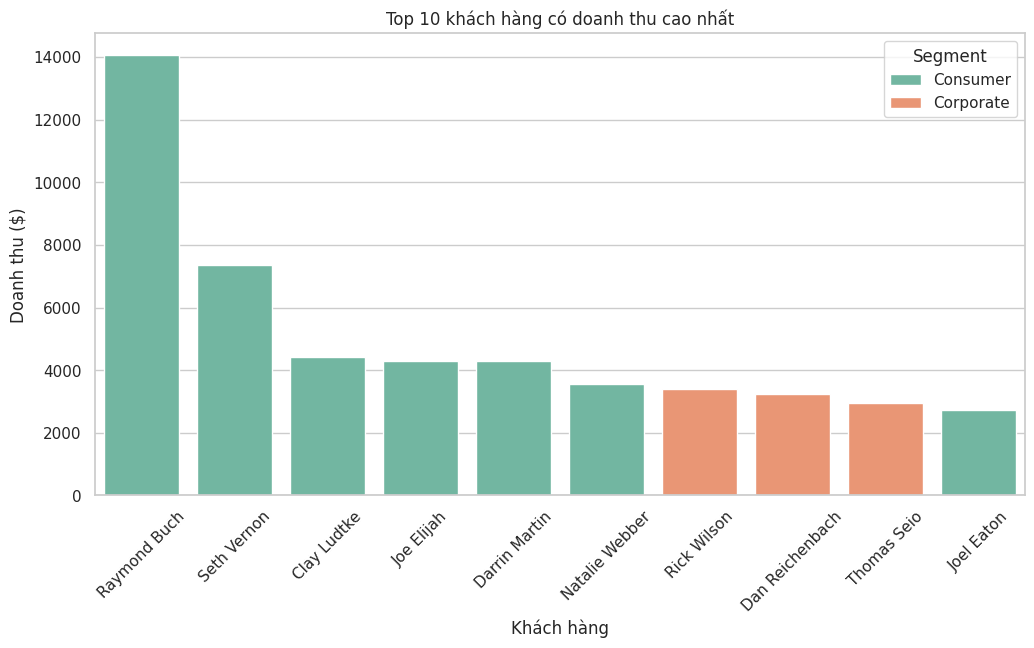

In [ ]:
# Chọn top 10 khách hàng có doanh thu cao nhất
top_revenue_customers = revenue_per_customer.head(10)

# Chọn top 10 khách hàng có số lượng đơn hàng nhiều nhất
top_orders_customers = orders_per_customer.head(10)

# Trực quan hóa top 10 khách hàng có doanh thu cao nhất
plt.figure(figsize=(12, 6))
sns.barplot(x=top_revenue_customers['Customer Name'], y=top_revenue_customers['Sales'], hue=top_revenue_customers['Segment'], palette='Set2')
plt.title('Top 10 khách hàng có doanh thu cao nhất')
plt.xlabel('Khách hàng')
plt.ylabel('Doanh thu ($)')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()



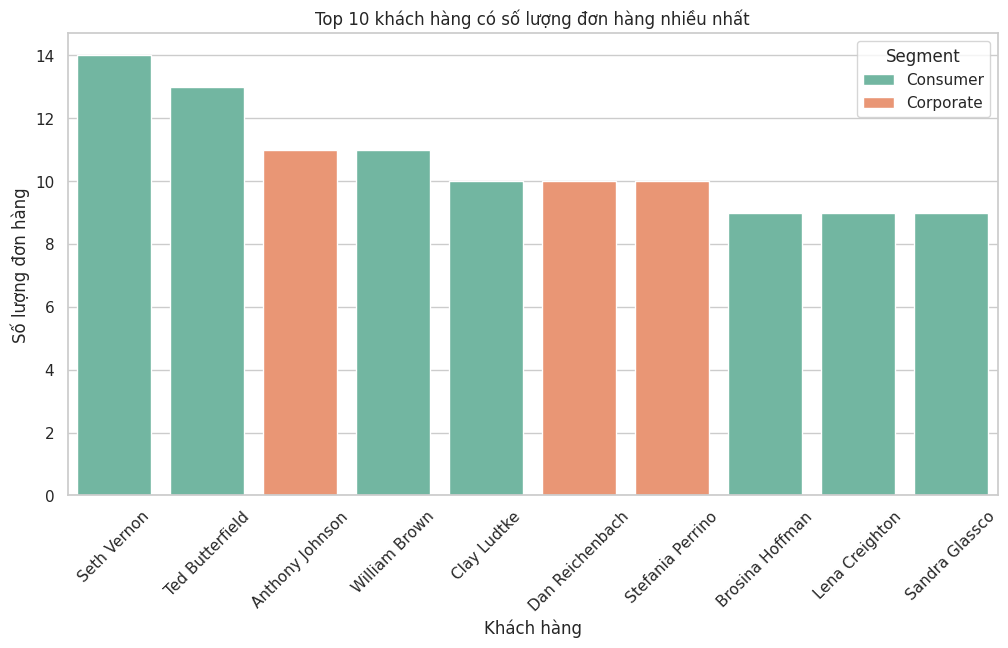

In [ ]:
# Trực quan hóa top 10 khách hàng có số lượng đơn hàng nhiều nhất
plt.figure(figsize=(12, 6))
sns.barplot(x=top_orders_customers['Customer Name'], y=top_orders_customers['Order ID'], hue=top_orders_customers['Segment'], palette='Set2')
plt.title('Top 10 khách hàng có số lượng đơn hàng nhiều nhất')
plt.xlabel('Khách hàng')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

# 2.3. Phân tích sản phẩm

In [ ]:
# Tính tổng doanh thu từng danh mục sản phẩm
revenue_per_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

print("\nTổng doanh thu từng danh mục sản phẩm:")
print(revenue_per_category)

# Tính tổng số lượng bán được từng danh mục sản phẩm
quantity_per_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

print("\nTổng số lượng bán được từng danh mục sản phẩm:")
print(quantity_per_category)

# Tính tổng doanh thu từng loại sản phẩm
revenue_per_subcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

print("\nTổng doanh thu từng loại sản phẩm:")
print(revenue_per_subcategory)

# Tính tổng số lượng bán được từng loại sản phẩm
quantity_per_subcategory = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)

print("\nTổng số lượng bán được từng loại sản phẩm:")
print(quantity_per_subcategory)



Tổng doanh thu từng danh mục sản phẩm:
Category
Technology         72708.1740
Furniture          59219.1749
Office Supplies    48576.9290
Name: Sales, dtype: float64

Tổng số lượng bán được từng danh mục sản phẩm:
Category
Office Supplies    1835
Furniture           654
Technology          564
Name: Quantity, dtype: int64

Tổng doanh thu từng loại sản phẩm:
Sub-Category
Phones         27633.6140
Chairs         25154.7020
Copiers        19199.8400
Tables         17042.2820
Storage        14679.9280
Machines       13158.3900
Accessories    12716.3300
Appliances     10129.7820
Binders         9983.1490
Furnishings     9577.5500
Bookcases       7444.6409
Paper           7140.2820
Supplies        3195.9620
Art             1429.1240
Envelopes        919.7460
Labels           885.8660
Fasteners        213.0900
Name: Sales, dtype: float64

Tổng số lượng bán được từng loại sản phẩm:
Sub-Category
Binders        558
Paper          453
Furnishings    277
Phones         263
Accessories    221
Stor

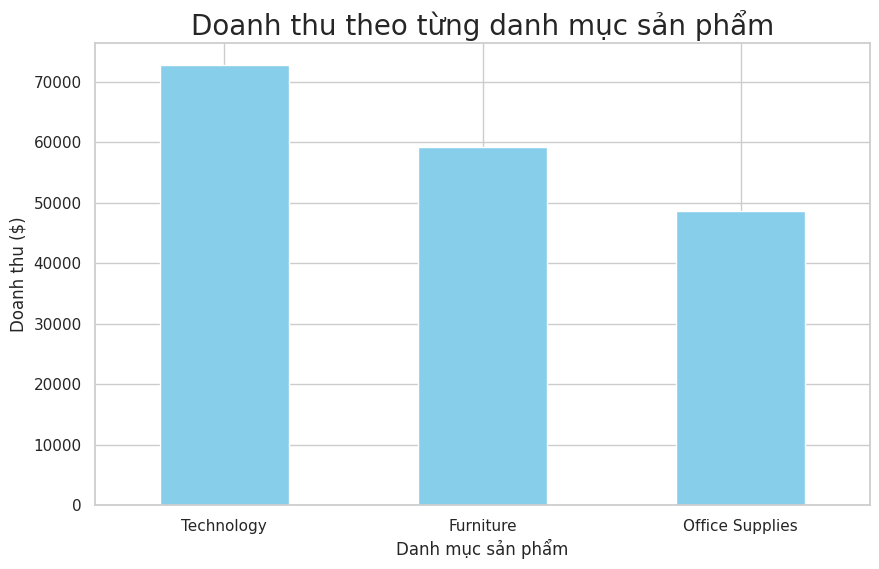

In [ ]:

# Trực quan hóa tổng doanh thu từng danh mục sản phẩm
plt.figure(figsize=(10, 6))
revenue_per_category.plot(kind='bar', color='skyblue')
plt.title('Doanh thu theo từng danh mục sản phẩm', fontsize=20)
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Doanh thu ($)')
plt.xticks(rotation=0)
plt.show()



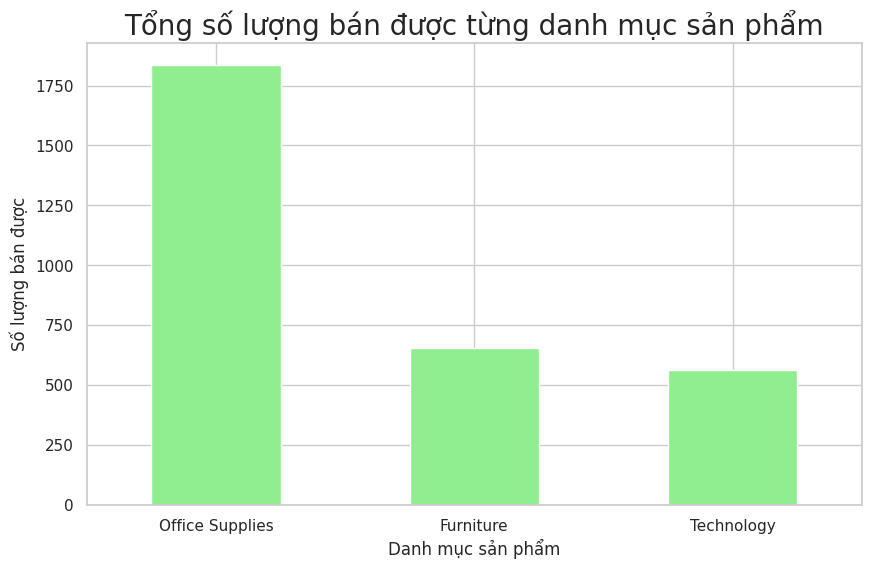

In [ ]:
# Trực quan hóa tổng số lượng bán được từng danh mục sản phẩm
plt.figure(figsize=(10, 6))
quantity_per_category.plot(kind='bar', color='lightgreen')
plt.title('Tổng số lượng bán được từng danh mục sản phẩm', fontsize=20)
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Số lượng bán được')
plt.xticks(rotation=0)
plt.show()



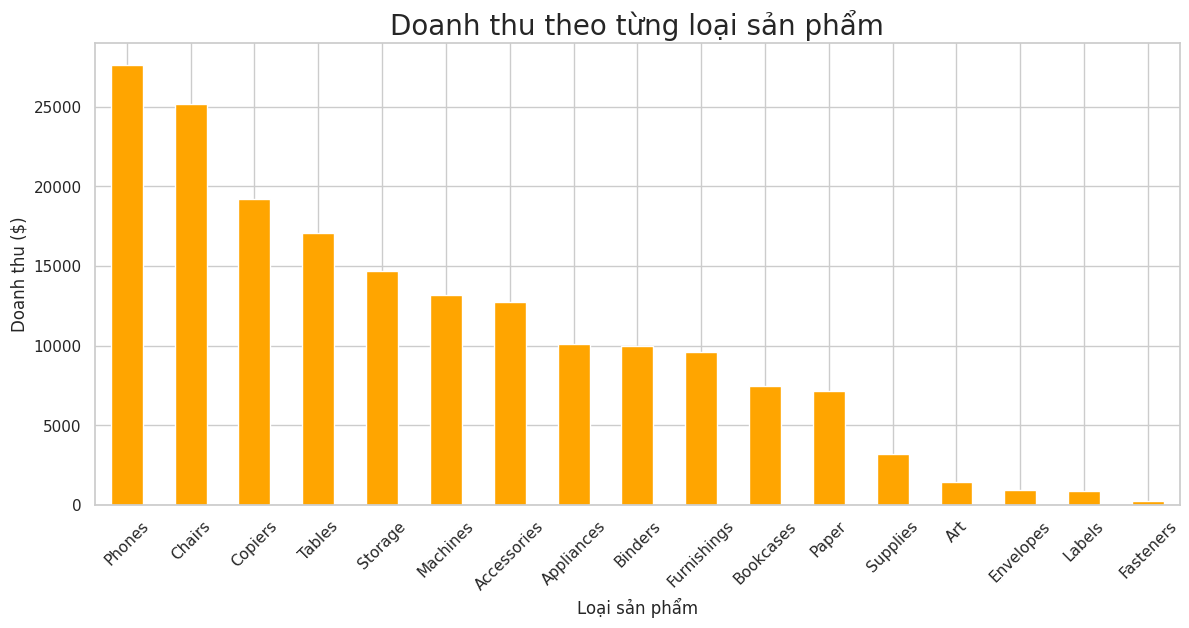

In [ ]:
# Trực quan hóa tổng doanh thu từng loại sản phẩm
plt.figure(figsize=(14, 6))
revenue_per_subcategory.plot(kind='bar', color='orange')
plt.title('Doanh thu theo từng loại sản phẩm', fontsize=20)
plt.xlabel('Loại sản phẩm')
plt.ylabel('Doanh thu ($)')
plt.xticks(rotation=45)
plt.show()



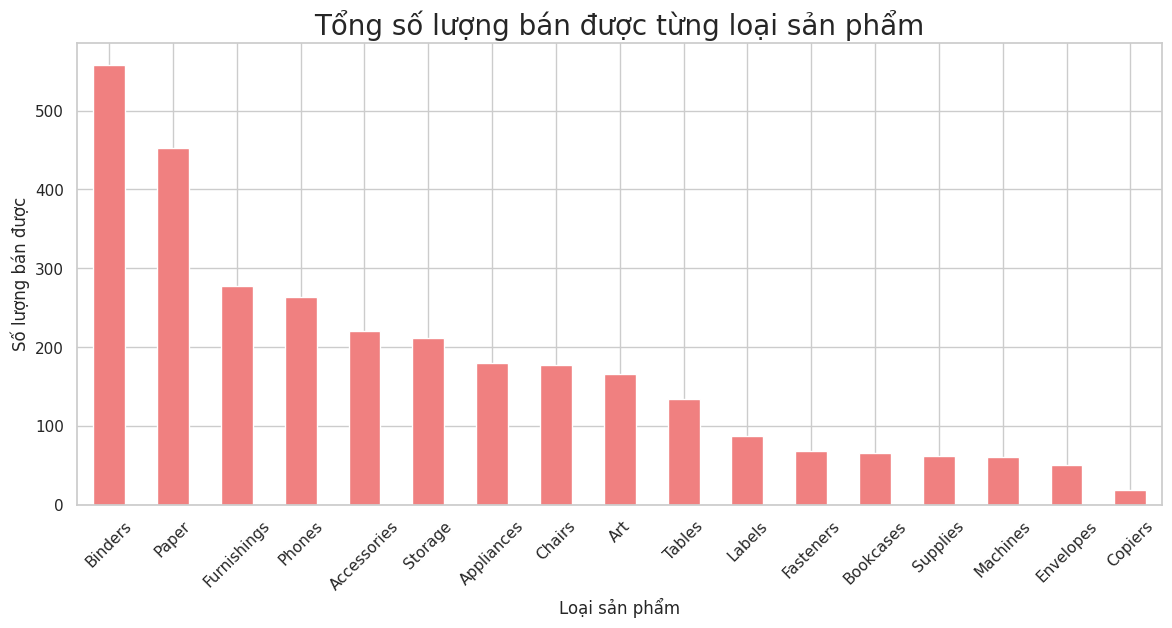

In [ ]:
# Trực quan hóa tổng số lượng bán được từng loại sản phẩm
plt.figure(figsize=(14, 6))
quantity_per_subcategory.plot(kind='bar', color='lightcoral')
plt.title('Tổng số lượng bán được từng loại sản phẩm', fontsize=20)
plt.xlabel('Loại sản phẩm')
plt.ylabel('Số lượng bán được')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Phân tích sản phẩm bán chạy

# Tính tổng doanh thu từng sản phẩm
revenue_per_product = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

print("Top 10 sản phẩm có doanh thu cao nhất:")
print(revenue_per_product.head(10))  # In ra 10 sản phẩm có doanh thu cao nhất

# Tính tổng số lượng bán được từng sản phẩm
quantity_per_product = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

print("\nTop 10 sản phẩm có số lượng bán được cao nhất:")
print(quantity_per_product.head(10))  # In ra 10 sản phẩm có số lượng bán được cao nhất


Top 10 sản phẩm có doanh thu cao nhất:
Product Name
Canon imageCLASS 2200 Advanced Copier                         13999.960
Global Troy Executive Leather Low-Back Tilter                  3055.978
Hon 4070 Series Pagoda Armless Upholstered Stacking Chairs     2888.127
Ativa V4110MDD Micro-Cut Shredder                              2799.960
Sharp AL-1530CS Digital Copier                                 2799.944
Zebra GX420t Direct Thermal/Thermal Transfer Printer           2548.560
Sanyo 2.5 Cubic Foot Mid-Size Office Refrigerators             2518.290
HON 5400 Series Task Chairs for Big and Tall                   2453.430
Samsung Galaxy S III - 16GB - pebble blue (T-Mobile)           2239.936
GBC DocuBind P400 Electric Binding System                      2177.584
Name: Sales, dtype: float64

Top 10 sản phẩm có số lượng bán được cao nhất:
Product Name
KI Adjustable-Height Table                                                   23
Staple holder                                              

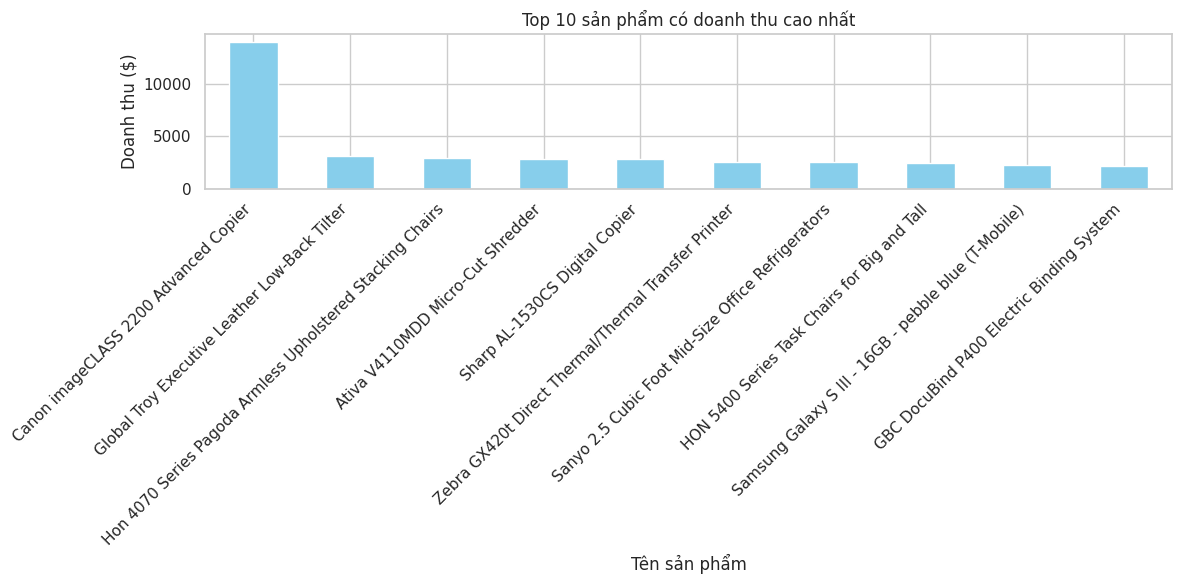

In [ ]:

# Trực quan hóa top 10 sản phẩm có doanh thu cao nhất
plt.figure(figsize=(12, 6))
revenue_per_product.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 sản phẩm có doanh thu cao nhất')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Doanh thu ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



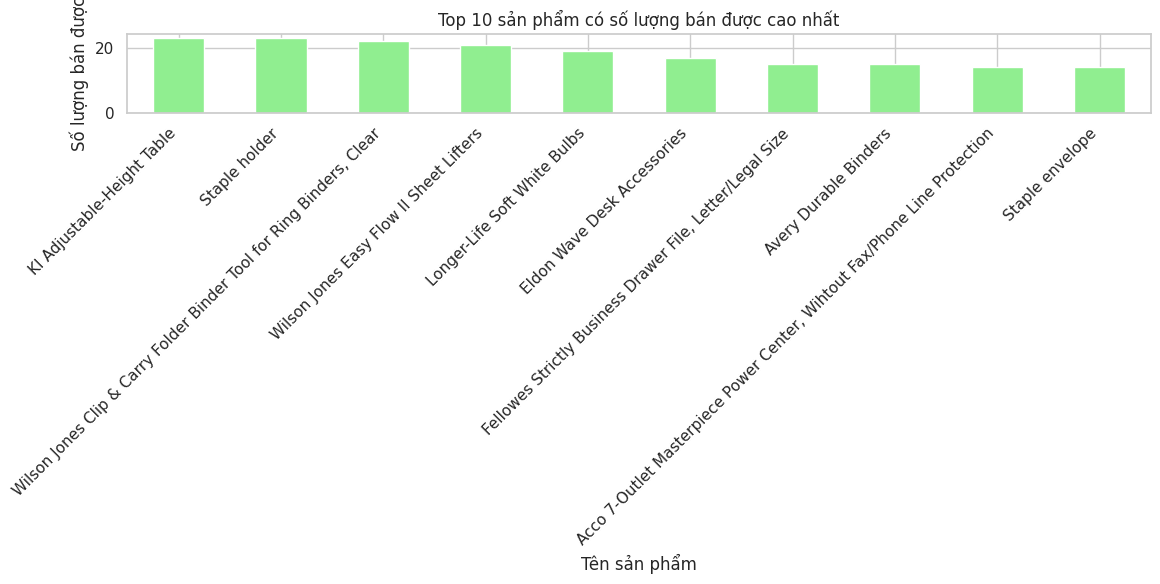

In [ ]:
# Trực quan hóa top 10 sản phẩm có số lượng bán được cao nhất
plt.figure(figsize=(12, 6))
quantity_per_product.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 sản phẩm có số lượng bán được cao nhất')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Số lượng bán được')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2.4. Phân tích theo khu vực địa lý

Số lượng Đơn hàng theo Khu vực:
Region
West       490
East       149
Central     92
South       69
Name: count, dtype: int64


<ipython-input-171-984cdae42fb2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_count_per_region.index, y=order_count_per_region.values, palette='Set3')


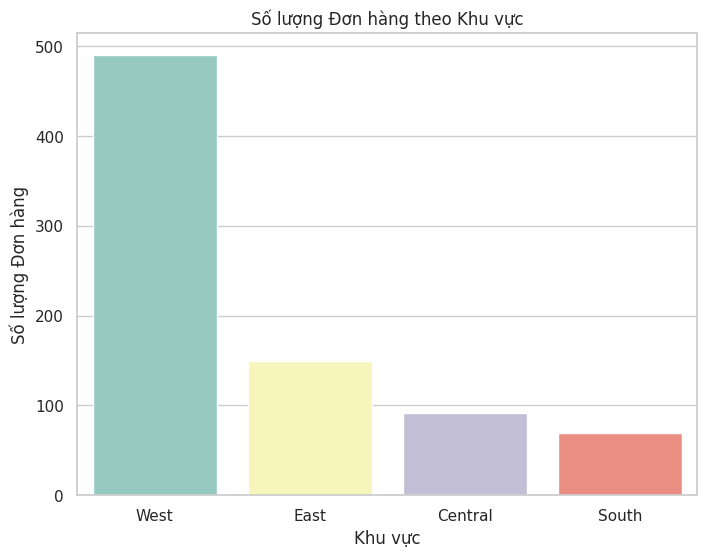

In [ ]:

# Đếm số lượng đơn hàng theo Khu vực
order_count_per_region = df['Region'].value_counts()
print("Số lượng Đơn hàng theo Khu vực:")
print(order_count_per_region)
plt.figure(figsize=(8, 6))
sns.barplot(x=order_count_per_region.index, y=order_count_per_region.values, palette='Set3')
plt.title('Số lượng Đơn hàng theo Khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Số lượng Đơn hàng')
plt.show()




Doanh thu theo Khu vực:
Region
West       107483.0575
East        41705.1440
South       17309.0970
Central     14006.9794
Name: Sales, dtype: float64


<ipython-input-172-a1befceab5f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_per_region.index, y=revenue_per_region.values, palette='Blues_r')


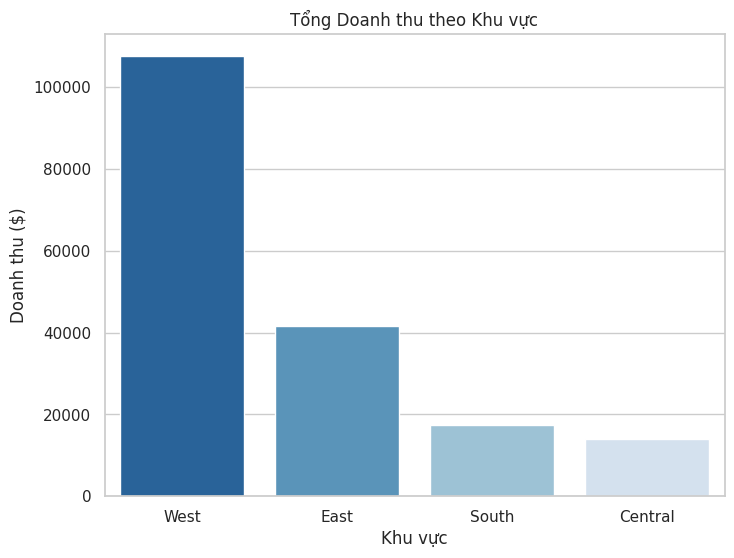

In [ ]:
# Tổng Doanh thu theo Khu vực
revenue_per_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("Doanh thu theo Khu vực:")
print(revenue_per_region)
plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_per_region.index, y=revenue_per_region.values, palette='Blues_r')
plt.title('Tổng Doanh thu theo Khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Doanh thu ($)')
plt.show()



KH theo Khu vực:
Region
West       490
East       149
Central     92
South       69
Name: count, dtype: int64


<ipython-input-173-ca7f1bdaa8d3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_count_per_region.index, y=customer_count_per_region.values, palette='Pastel2')


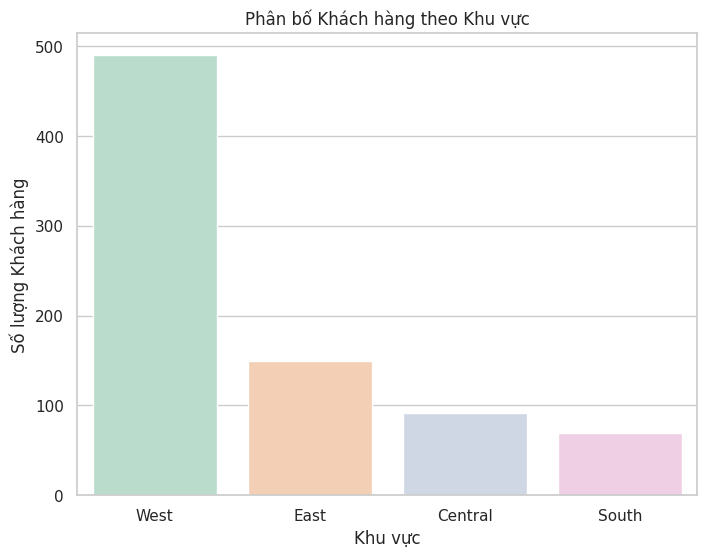

In [ ]:
# Phân bố Khách hàng theo Khu vực
customer_count_per_region = df['Region'].value_counts()
print("KH theo Khu vực:")
print(customer_count_per_region)
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_count_per_region.index, y=customer_count_per_region.values, palette='Pastel2')
plt.title('Phân bố Khách hàng theo Khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Số lượng Khách hàng')
plt.show()



Ship Mode  First Class  Same Day  Second Class  Standard Class
Region                                                        
Central           15.0      12.0           6.0            59.0
East              30.0       9.0          28.0            82.0
South              8.0       NaN           4.0            57.0
West              99.0      43.0          96.0           252.0


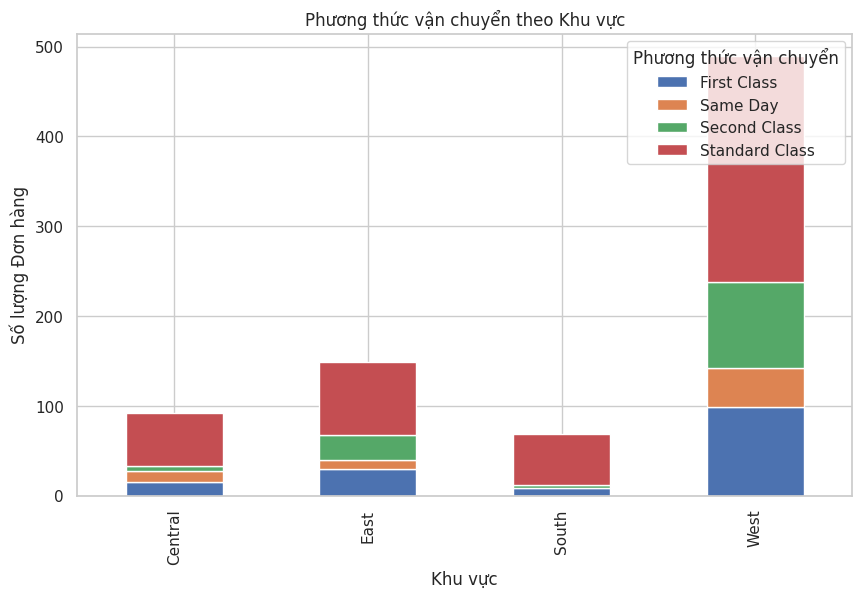

In [ ]:
# Phân tích hiệu quả vận chuyển theo Khu vực
ship_mode_per_region = df.groupby('Region')['Ship Mode'].value_counts().unstack()
ship_mode_per_region.plot(kind='bar', stacked=True, figsize=(10, 6))
print(ship_mode_per_region)

plt.title('Phương thức vận chuyển theo Khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Số lượng Đơn hàng')
plt.legend(title='Phương thức vận chuyển', loc='upper right')
plt.show()

# 2.5. Phân tích tài chính

<ipython-input-175-5b14dd0e3440>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Sales', data=annual_sales, palette="Blues_d")


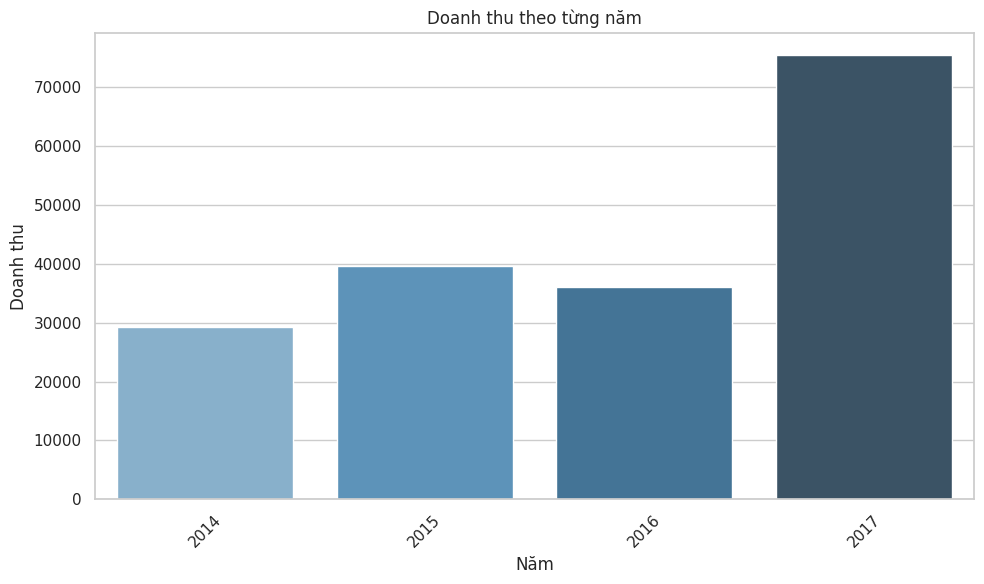

In [ ]:
# 2
# Thiết lập kiểu dáng cho các biểu đồ
sns.set(style="whitegrid")

# Biểu đồ doanh thu theo từng năm
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Year', y='Sales', data=annual_sales, palette="Blues_d")
plt.title('Doanh thu theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



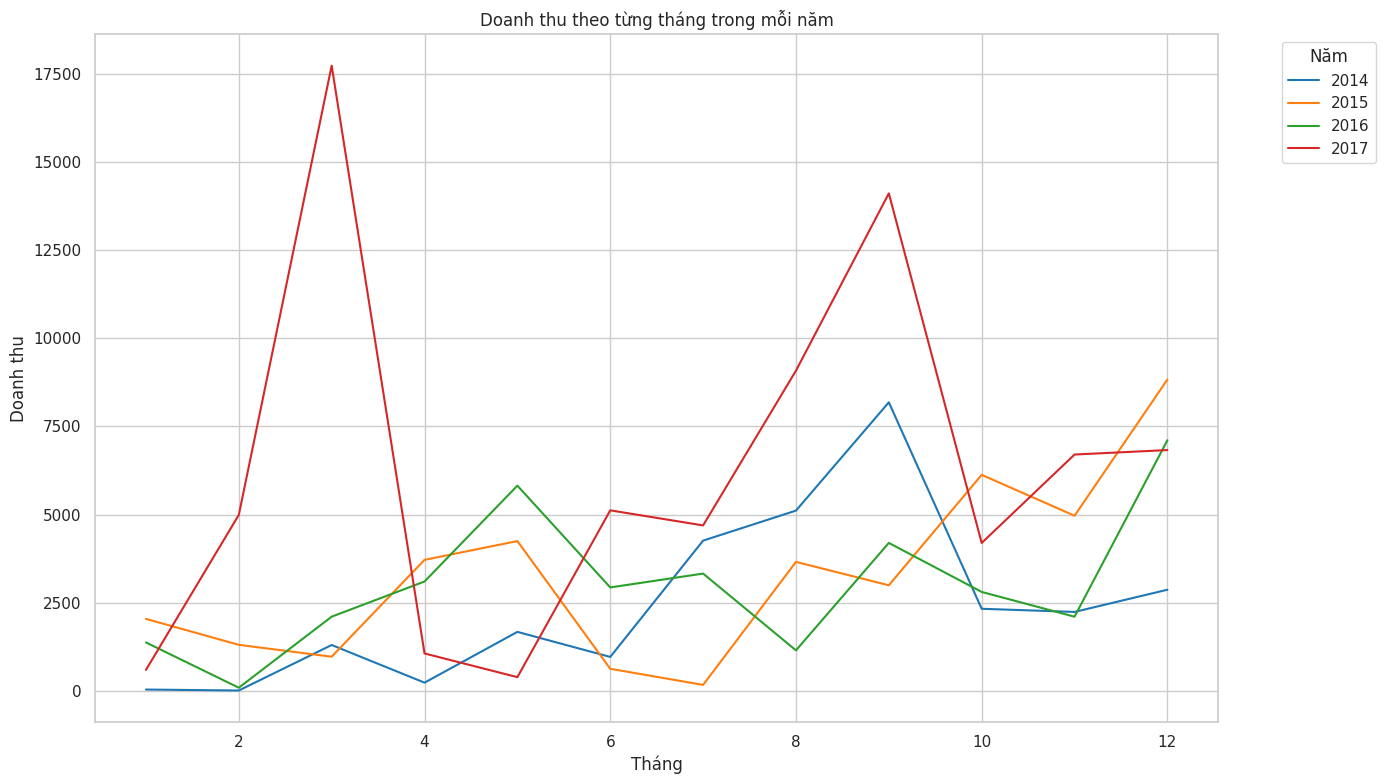

In [ ]:
# Biểu đồ doanh thu theo từng tháng trong mỗi năm
plt.figure(figsize=(14, 8))
sns.lineplot(x='Order Month', y='Sales', hue='Order Year', data=monthly_sales, palette="tab10")
plt.title('Doanh thu theo từng tháng trong mỗi năm')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.legend(title='Năm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# phân tích lợi nhuận
# Tính tỷ suất lợi nhuận
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# Tính tỷ suất lợi nhuận trung bình theo danh mục sản phẩm
average_profit_margin = df.groupby('Category')['Profit Margin (%)'].mean().sort_values(ascending=False)

print("\nTỷ suất lợi nhuận trung bình theo danh mục sản phẩm:")
print(average_profit_margin)



Tỷ suất lợi nhuận trung bình theo danh mục sản phẩm:
Category
Office Supplies    17.480150
Technology         11.613477
Furniture           9.957122
Name: Profit Margin (%), dtype: float64


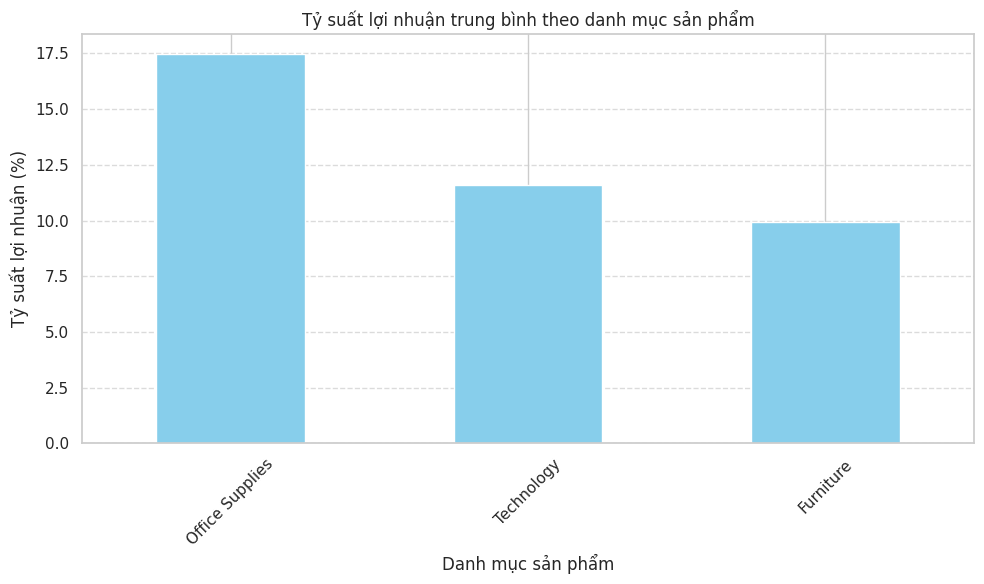

In [ ]:

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
average_profit_margin.plot(kind='bar', color='skyblue')
plt.title('Tỷ suất lợi nhuận trung bình theo danh mục sản phẩm')
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Tỷ suất lợi nhuận (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


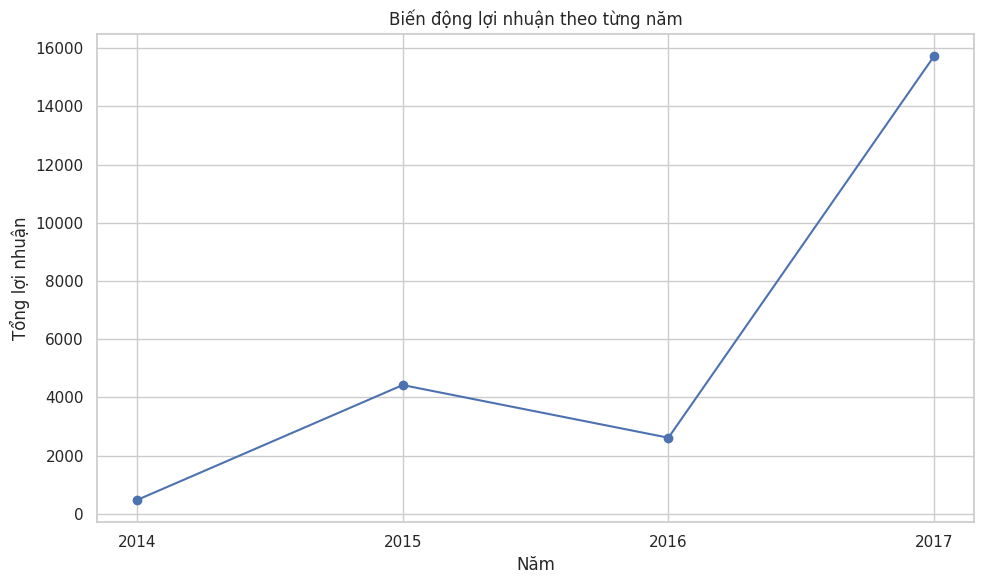

In [ ]:
# Tính tổng lợi nhuận từng năm
profit_by_year = df.groupby('Order Year')['Profit'].sum()

# Vẽ biểu đồ đường biểu thị biến động lợi nhuận theo từng năm
plt.figure(figsize=(10, 6))
plt.plot(profit_by_year.index, profit_by_year.values, marker='o', linestyle='-')
plt.title('Biến động lợi nhuận theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Tổng lợi nhuận')
plt.grid(True)
plt.xticks(profit_by_year.index)
plt.tight_layout()
plt.show()

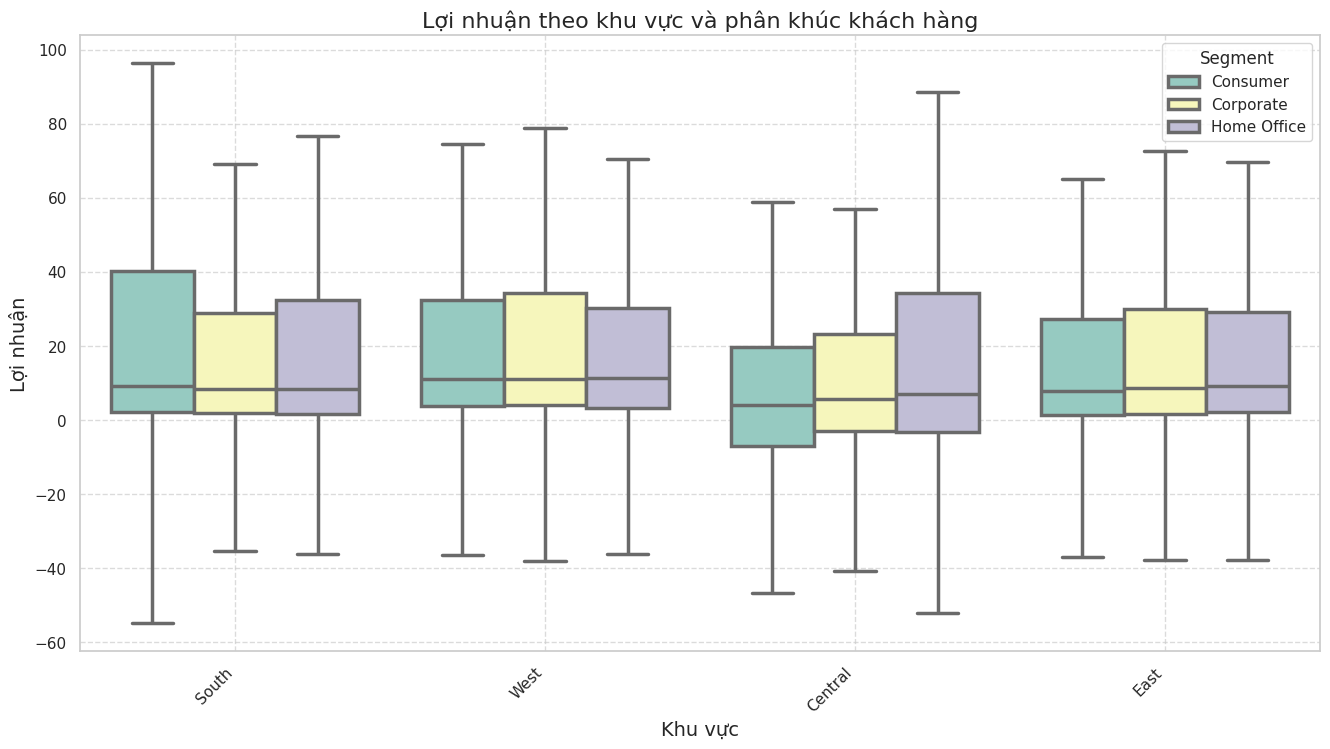

In [ ]:
#5
plt.figure(figsize=(16, 8))

sns.boxplot(data=orders_df, x='Region', y='Profit', hue='Segment',
            palette="Set3",
            linewidth=2.5,
            showfliers=False)
plt.title('Lợi nhuận theo khu vực và phân khúc khách hàng', fontsize=16)
plt.xlabel('Khu vực', fontsize=14)
plt.ylabel('Lợi nhuận', fontsize=14)

# Xoay nhãn trục x nếu cần
plt.xticks(rotation=45, ha='right')
# Hiển thị lưới
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('p5.png')
plt.show()

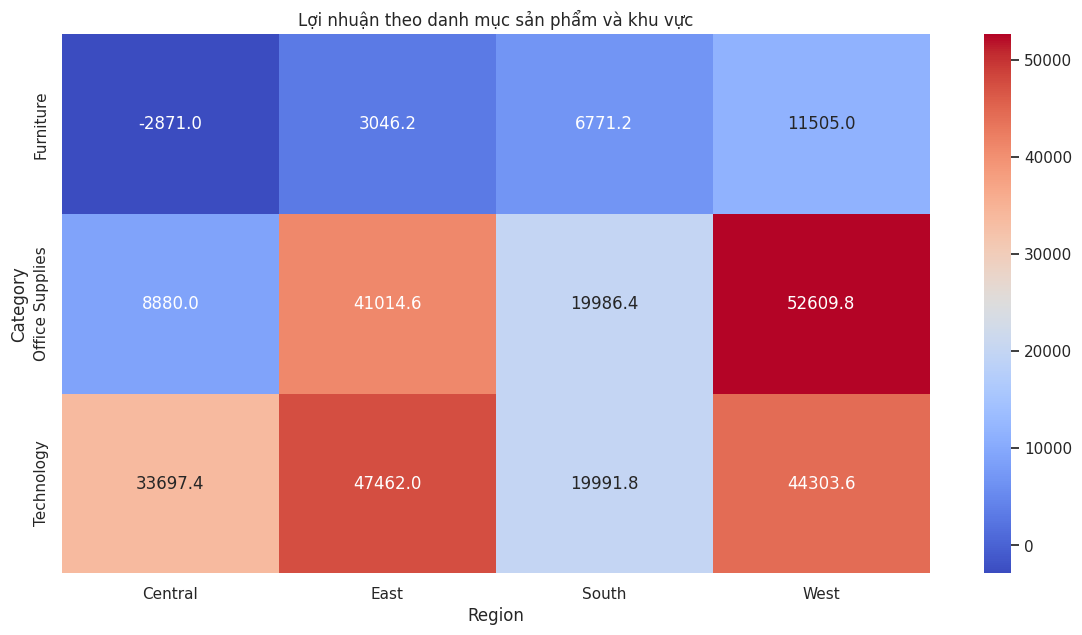

In [ ]:
#7
plt.figure(figsize=(14, 7))
profit_pivot = orders_df.pivot_table(values='Profit', index='Category', columns='Region', aggfunc='sum')
sns.heatmap(profit_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Lợi nhuận theo danh mục sản phẩm và khu vực')
plt.savefig('p7.png')
plt.show()

Tổng doanh thu với chiết khấu: 180504.2779
Tổng doanh thu không có chiết khấu: 225972.82
Tổng lợi nhuận với chiết khấu: 23232.361499999995
Tổng lợi nhuận không có chiết khấu: -1662.300688445397


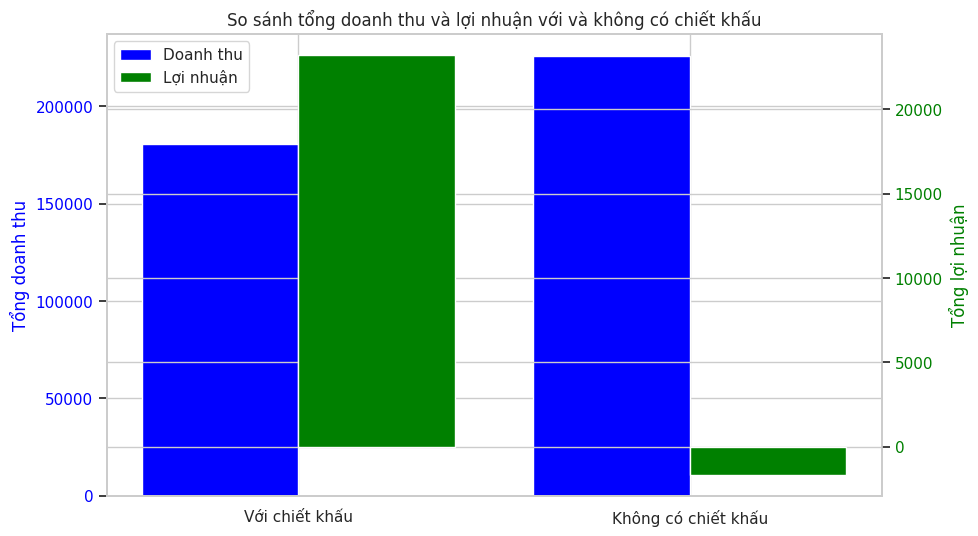

In [ ]:
# Tính toán tổng doanh thu với và không có chiết khấu
df['Sales Without Discount'] = df['Sales'] / (1 - df['Discount'])
total_sales_with_discount = df['Sales'].sum()
total_sales_without_discount = df['Sales Without Discount'].sum()

# Tính tổng lợi nhuận với và không có chiết khấu
df['Profit Without Discount'] = df['Profit'] / (1 - df['Discount'])
total_profit_with_discount = df['Profit'].sum()
total_profit_without_discount = df['Profit Without Discount'].sum()

print("Tổng doanh thu với chiết khấu:", total_sales_with_discount)
print("Tổng doanh thu không có chiết khấu:", total_sales_without_discount)
print("Tổng lợi nhuận với chiết khấu:", total_profit_with_discount)
print("Tổng lợi nhuận không có chiết khấu:", total_profit_without_discount)

# Biểu đồ so sánh tổng doanh thu và lợi nhuận với và không có chiết khấu
labels = ['Với chiết khấu', 'Không có chiết khấu']
total_sales = [total_sales_with_discount, total_sales_without_discount]
total_profit = [total_profit_with_discount, total_profit_without_discount]

x = range(len(labels))

fig, ax1 = plt.subplots(figsize=(10, 6))

bar1 = ax1.bar(x, total_sales, width=0.4, label='Doanh thu', color='blue')
ax1.set_ylabel('Tổng doanh thu', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
bar2 = ax2.bar([i + 0.4 for i in x], total_profit, width=0.4, label='Lợi nhuận', color='green')
ax2.set_ylabel('Tổng lợi nhuận', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.xticks([i + 0.2 for i in x], labels)
plt.title('So sánh tổng doanh thu và lợi nhuận với và không có chiết khấu')
plt.legend(handles=[bar1, bar2], loc='upper left')

plt.show()


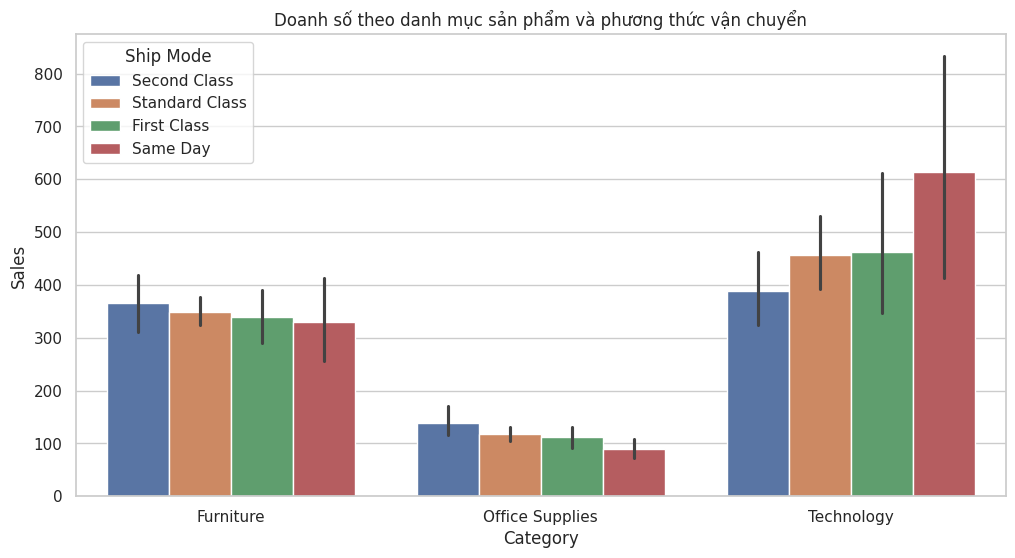

In [ ]:
#1
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_df, x='Category', y='Sales', hue='Ship Mode')
plt.title('Doanh số theo danh mục sản phẩm và phương thức vận chuyển')
plt.show()

# 2.6. Phân tích tỉ lệ hoàn trả đơn hàng

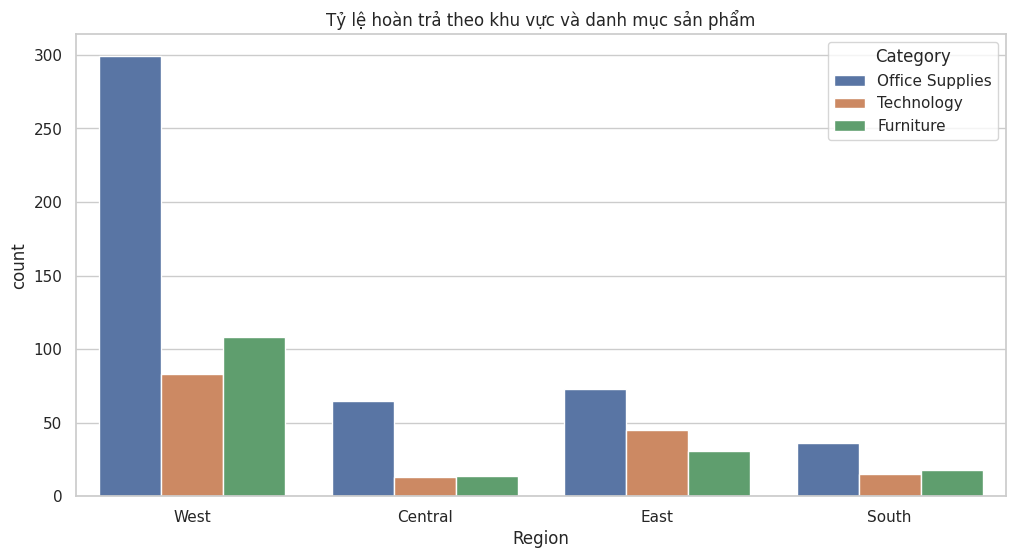

In [ ]:
#3
plt.figure(figsize=(12, 6))
sns.countplot(data=returns_orders_df, x='Region', hue='Category')
plt.title('Tỷ lệ hoàn trả theo khu vực và danh mục sản phẩm')
plt.savefig('p3.png')
plt.show()

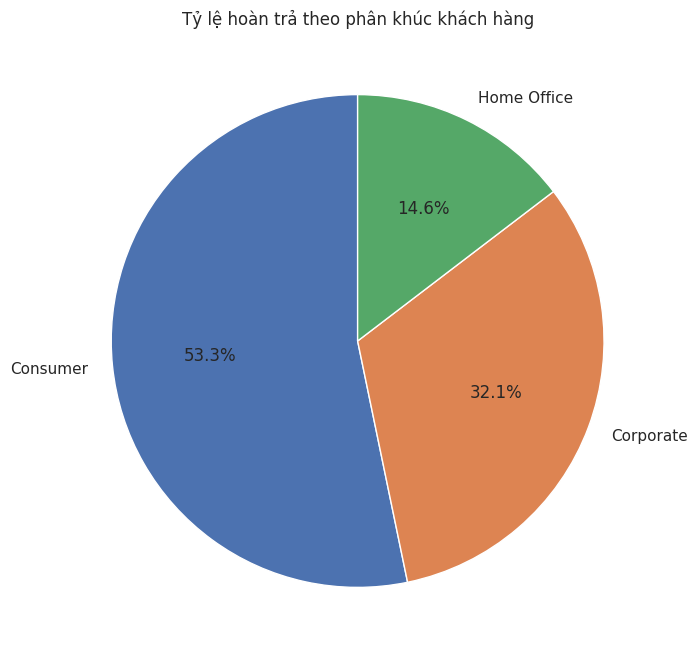

In [ ]:
#4
# Tính tổng số lượng hoàn trả cho mỗi phân khúc
segment_returns = returns_orders_df['Segment'].value_counts()

# Tạo biểu đồ pie
plt.figure(figsize=(8, 8))
plt.pie(segment_returns, labels=segment_returns.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ hoàn trả theo phân khúc khách hàng')
plt.savefig('p4.png')
plt.show()